## CA_Algorithms Plots

### Part 1: Kernel Ridge Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# loading the dataset
data = pd.read_csv("/Users/shaozishan/Desktop/Data_Plot_BDCD/NERSC_outputs/para_ca_data_duke_linear.csv")

In [11]:
# Scaling Plot (Duke Breast Cancer Dataset)
# data = pd.read_csv("/Users/shaozishan/Desktop/Research/Parallel Machine Learning/outputs/Poly_5_pyrim_cabdcd.csv")

In [13]:
# see the details of the dataset
data.head(6)

,filename,kernel,num_process,s,blksize,degree,max_iter,Gauss_para,LAMBDA,csr_setup_time,kernel_computation,allreduce_time,sample_time,csr_read_time,gradient_comp_time,alpha_update,memory_reset,major_time,runtime
0,duke,linear,512,64,1,5,12800,0.0001,0.00001,3.827560,7.412000e-07,0.000077,2.920000e-08,2.886561,8.753300e-06,1.300000e-09,3.894000e-07,0.000086,7.820873
1,duke,linear,512,32,1,5,12800,0.0001,0.00001,3.950102,7.920000e-07,0.000097,3.150000e-08,2.948577,7.933000e-07,1.800000e-09,1.820000e-08,0.000098,8.155369
2,duke,linear,512,16,1,5,12800,0.0001,0.00001,3.581566,9.081000e-07,0.000061,4.000000e-08,3.047376,7.391000e-07,2.700000e-09,2.050000e-08,0.000063,7.436394
3,duke,linear,512,8,1,5,12800,0.0001,0.00001,3.944145,1.202500e-06,0.000105,4.980000e-08,2.904878,7.453000e-07,5.200000e-09,2.140000e-08,0.000107,8.213758
4,duke,linear,512,4,1,5,12800,0.0001,0.00001,4.215671,1.643100e-06,0.000117,7.620000e-08,3.003985,7.566000e-07,1.020000e-08,3.600000e-08,0.000120,8.756268
5,duke,linear,512,2,1,5,12800,0.0001,0.00001,3.521146,2.581600e-06,0.000099,1.230000e-07,2.775046,7.832000e-07,1.980000e-08,4.790000e-08,0.000103,7.611018


In [14]:
# get the data with blksize = 1, np = 32
df = data[(data['num_process'] == 32) & (data['blksize'] == 1)]
df.head(7)

,filename,kernel,num_process,s,blksize,degree,max_iter,Gauss_para,LAMBDA,csr_setup_time,kernel_computation,allreduce_time,sample_time,csr_read_time,gradient_comp_time,alpha_update,memory_reset,major_time,runtime
84,duke,linear,32,64,1,5,12800,0.0001,0.00001,0.212894,0.000006,0.000007,8.860000e-08,0.179825,6.411000e-07,1.100000e-09,5.410000e-08,0.000013,0.561854
85,duke,linear,32,32,1,5,12800,0.0001,0.00001,0.213790,0.000007,0.000005,1.173000e-07,0.188980,6.649000e-07,1.600000e-09,1.660000e-08,0.000013,0.568582
86,duke,linear,32,16,1,5,12800,0.0001,0.00001,0.193739,0.000008,0.000007,1.108000e-07,0.167282,6.826000e-07,2.500000e-09,2.170000e-08,0.000016,0.560861
87,duke,linear,32,8,1,5,12800,0.0001,0.00001,0.193126,0.000010,0.000009,1.284000e-07,0.179617,6.691000e-07,4.500000e-09,2.230000e-08,0.000020,0.623134
88,duke,linear,32,4,1,5,12800,0.0001,0.00001,0.204287,0.000012,0.000013,1.457000e-07,0.205002,6.655000e-07,8.800000e-09,3.050000e-08,0.000026,0.738632
89,duke,linear,32,2,1,5,12800,0.0001,0.00001,0.190912,0.000018,0.000016,2.289000e-07,0.197493,7.209000e-07,1.720000e-08,5.760000e-08,0.000035,0.837191
90,duke,linear,32,0,1,5,12800,0.0001,0.00001,0.176035,0.000031,0.000032,1.600000e-07,0.170577,7.465000e-07,3.310000e-08,7.180000e-08,0.000064,1.165535


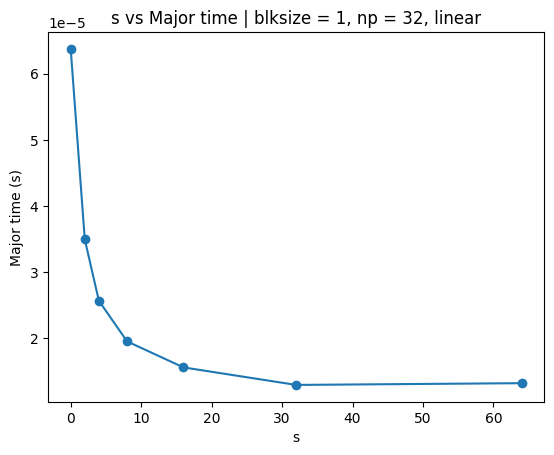

In [15]:
# Plot the runtime (major time) to see the strong scaling trend (by s)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# df = scaling[(scaling['s'] == 2) & (scaling['blksize'] == 1)]
df = data[(data['num_process'] == 32) & (data['blksize'] == 1)]

s = df['s']
major_time = df['major_time']

# Create the line plot
plt.plot(s, major_time, marker='o')

# Set the labels and title
plt.xlabel('s')
plt.ylabel('Major time (s)')
plt.title('s vs Major time | blksize = 1, np = 32, linear')

# Display the plot
plt.show()

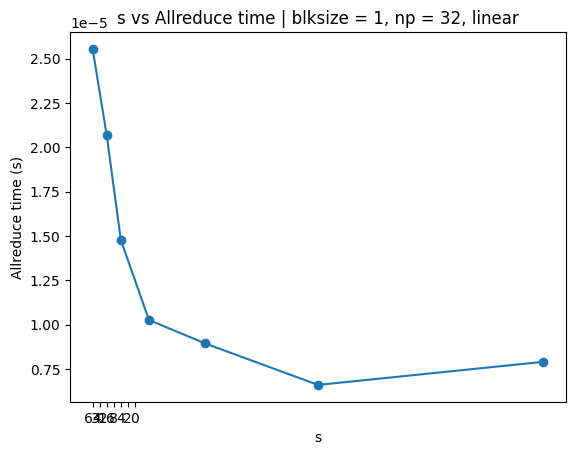

In [19]:
# Plot the allreduce time to see improvements in latency (by s)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# df = scaling[(scaling['s'] == 2) & (scaling['blksize'] == 1)]
df = data[(data['num_process'] == 64) & (data['blksize'] == 1)]

s = df['s']
major_time = df['allreduce_time']



# Create the line plot
plt.plot(s, major_time, marker='o')
# Place the x tick labels at evenly spaced intervals
plt.xticks(np.arange(len(s)), s)

# Set the labels and title
plt.xlabel('s')
plt.ylabel('Allreduce time (s)')
plt.title('s vs Allreduce time | blksize = 1, np = 32, linear')

# Display the plot
plt.show()

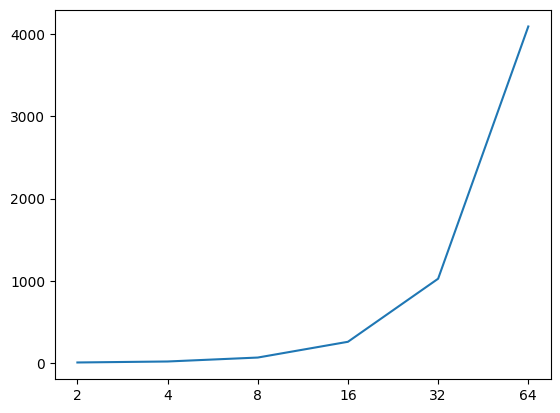

In [17]:
# Your x values
x = [2, 4, 8, 16, 32, 64]
# For demonstration, let's use x squared as the y values
y = [val**2 for val in x]

fig, ax = plt.subplots()

# Place the x tick labels at evenly spaced intervals
plt.xticks(np.arange(len(x)), x)

# Plot the data
plt.plot(y)

# Show the graph
plt.show()

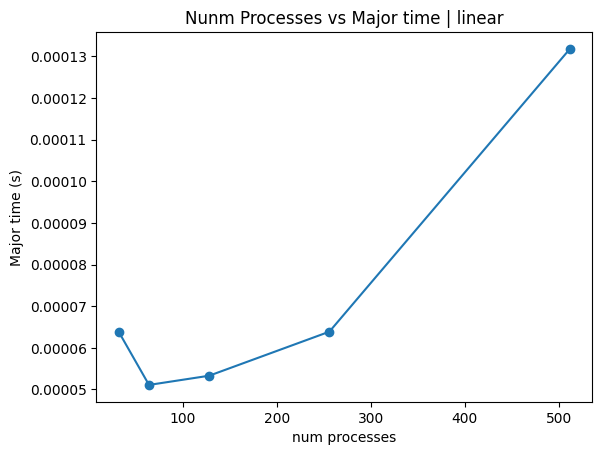

In [21]:
# Plot the impact of increasing processes vs major time reduced (all with blksize = 1)
# Plot the allreduce time to see improvements in latency (by s)

## In this case, only BDCD --> s = 0

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = data[(data['s'] == 0) & (data['blksize'] == 1)]

num_process = df['num_process']
major_time = df['major_time']

# Create the line plot
plt.plot(num_process, major_time, marker='o')

# Set the labels and title
plt.xlabel('num processes')
plt.ylabel('Major time (s)')
plt.title('Nunm Processes vs Major time | linear')

# Display the plot
plt.show()

# For the newsbinary dataset

In [82]:
data = pd.read_csv("/Users/shaozishan/Desktop/Data_Plot_BDCD/NERSC_outputs/caksvm_data_a9a_linear.csv")

In [83]:
data.head(7)

filename  kernel  num_process    s   blksize   
a9a.txt  linear 64 64 1         5    2560          1.0  1.0  0.053296  \
                   32 1         5    2560          1.0  1.0  0.030282   
                   16 1         5    2560          1.0  1.0  0.029237   
                   8  1         5    2560          1.0  1.0  0.029080   
                   4  1         5    2560          1.0  1.0  0.029410   
                   2  1         5    2560          1.0  1.0  0.028935   
                   1  1         5    2560          1.0  1.0  0.033383   

                           degree  max_iter    Gauss_para    LAMBDA   
a9a.txt  linear 64 64 1  0.000151  0.001191  2.677000e-07  0.038702  \
                   32 1  0.000105  0.001309  4.223000e-07  0.042782   
                   16 1  0.000031  0.002079  1.004000e-07  0.031603   
                   8  1  0.000045  0.001451  8.760000e-08  0.031023   
                   4  1  0.000069  0.001370  6.410000e-08  0.031669   
                   2  1  0.000099  0.001168  1.820000e-07  0.056628   
                   1  1  0.000123  0.001480  2.911000e-07  0.060591   

                         csr_setup_time  kernel_computation  allreduce_time   
a9a.txt  linear 64 64 1        0.000193        4.630000e-07        0.000448  \
                   32 1        0.000285        1.155400e-06        0.000472   
                   16 1        0.000072        2.882000e-07        0.000039   
                   8  1        0.000035        2.949000e-07        0.000060   
                   4  1        0.000024        2.819000e-07        0.000031   
                   2  1        0.000046        1.046500e-06        0.000067   
                   1  1        0.000042        1.023100e-06        0.000105   

                         sample_time  csr_read_time  
a9a.txt  linear 64 64 1     0.001983       5.168315  
                   32 1     0.002172       5.633936  
                   16 1     0.002222       5.749238  
                   8  1     0.001591       4.134087  
                   4  1     0.001494       3.885217  
                   2  1     0.001381       3.620833  
                   1  1     0.001750       4.575520

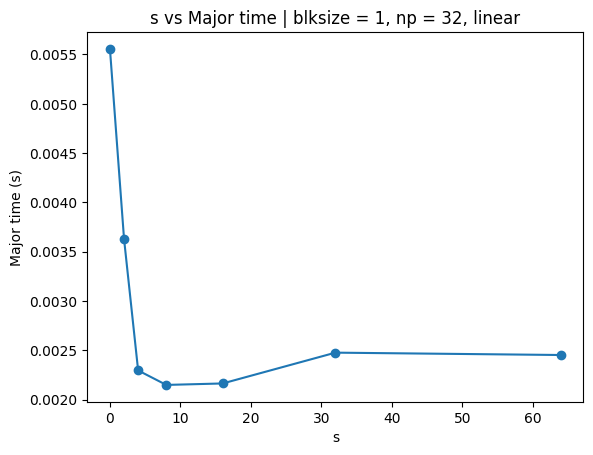

In [61]:
# Plot the runtime (major time) to see the strong scaling trend (by s)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# df = scaling[(scaling['s'] == 2) & (scaling['blksize'] == 1)]
df = data[(data['num_process'] == 768) & (data['blksize'] == 1)]

df = df[0:7]

s = df['s']
major_time = df['major_time']

# Create the line plot
plt.plot(s, major_time, marker='o')

# Set the labels and title
plt.xlabel('s')
plt.ylabel('Major time (s)')
plt.title('s vs Major time | blksize = 1, np = 32, linear')

# Display the plot
plt.show()

In [62]:
df.head()

,filename,kernel,num_process,s,blksize,degree,max_iter,Gauss_para,LAMBDA,csr_setup_time,kernel_computation,allreduce_time,sample_time,csr_read_time,gradient_comp_time,alpha_update,memory_reset,major_time,runtime
0,news20.binary,poly,768,64,1,5,640,1.0,1.0,4.684287,0.000484,0.001659,1.163200e-06,7.739198,0.000094,7.989000e-07,0.000215,0.002453,13.993621
1,news20.binary,poly,768,32,1,5,640,1.0,1.0,4.591509,0.000606,0.001671,1.481800e-06,7.677935,0.000056,9.773000e-07,0.000142,0.002477,13.854906
2,news20.binary,poly,768,16,1,5,640,1.0,1.0,4.568885,0.000691,0.001362,1.351100e-06,7.782420,0.000043,1.467400e-06,0.000065,0.002165,13.736921
3,news20.binary,poly,768,8,1,5,640,1.0,1.0,4.568733,0.000850,0.001198,7.889000e-07,7.912754,0.000051,1.549900e-06,0.000049,0.002150,13.857613
4,news20.binary,poly,768,4,1,5,640,1.0,1.0,4.606691,0.001255,0.000953,5.615000e-07,7.815314,0.000060,2.260100e-06,0.000025,0.002297,13.892093


### for loop plotting of s vs major time

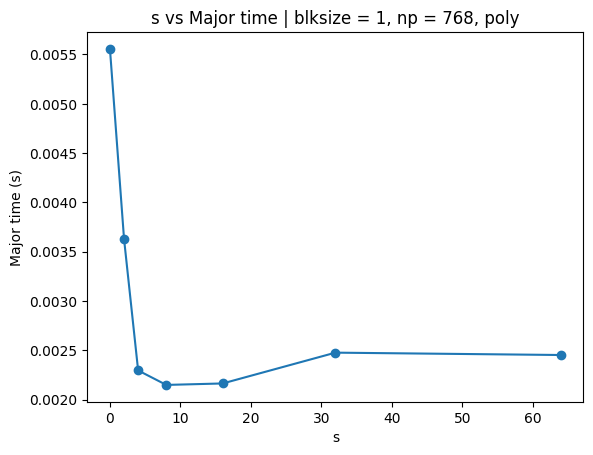

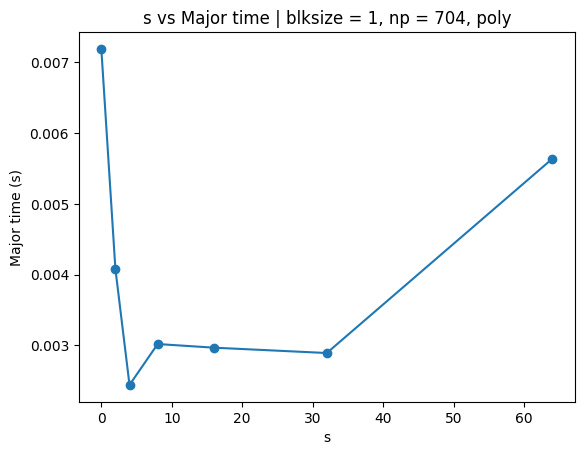

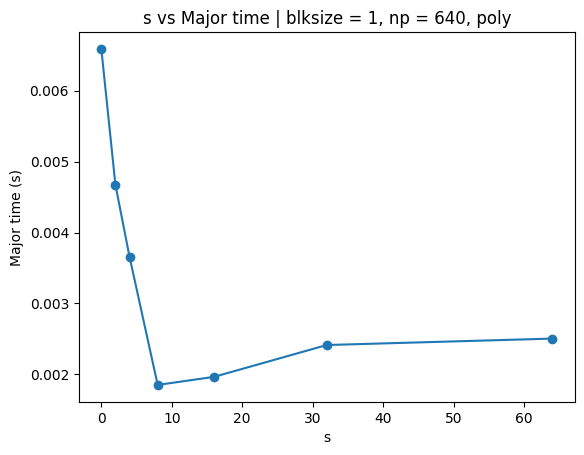

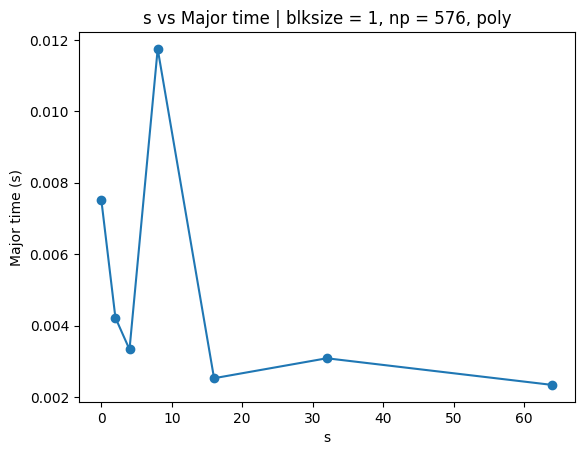

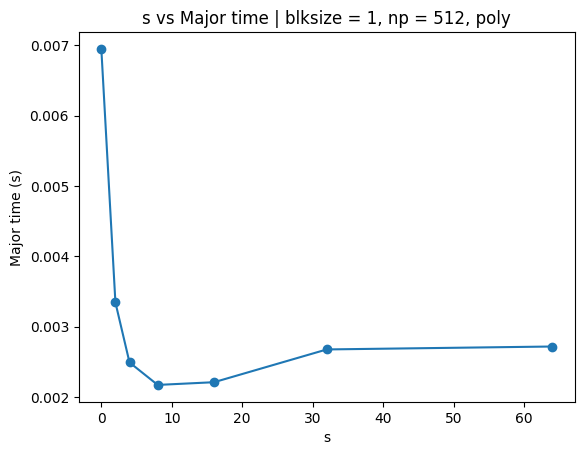

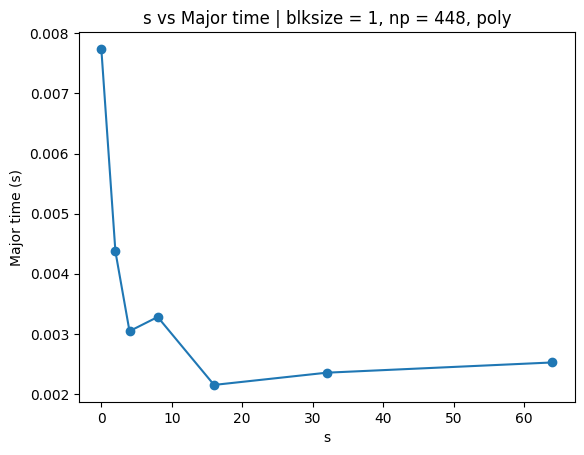

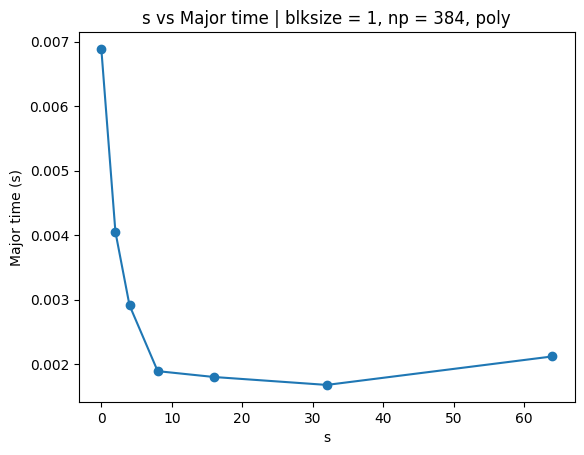

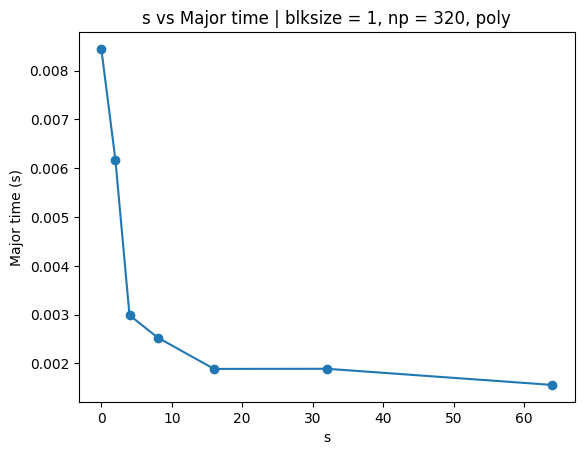

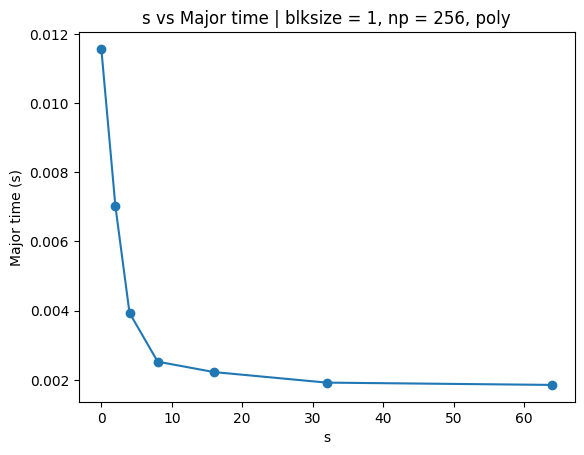

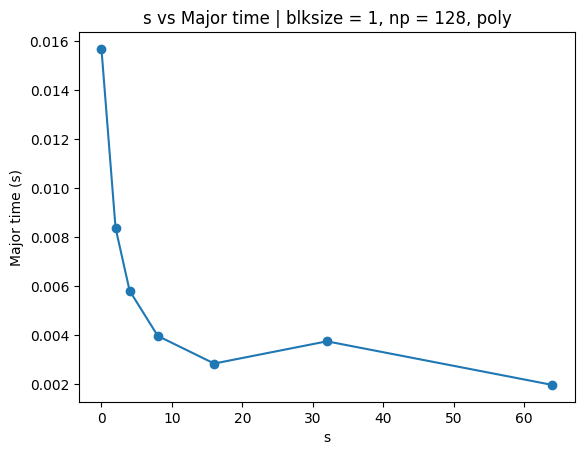

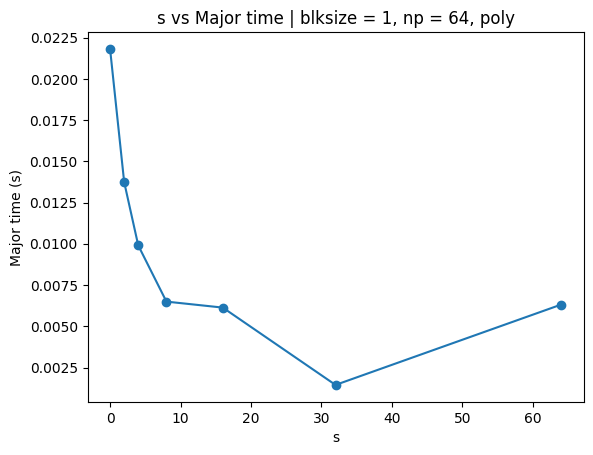

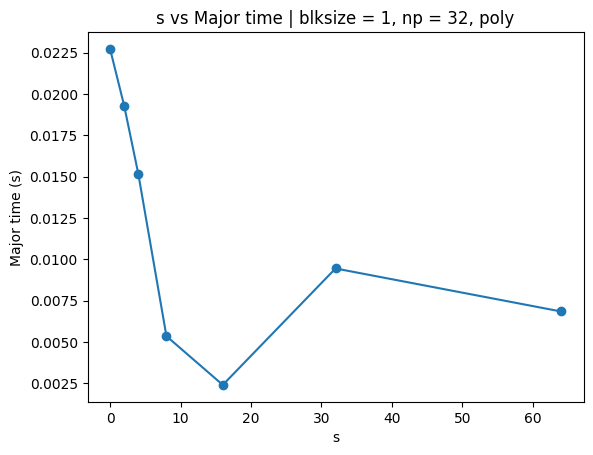

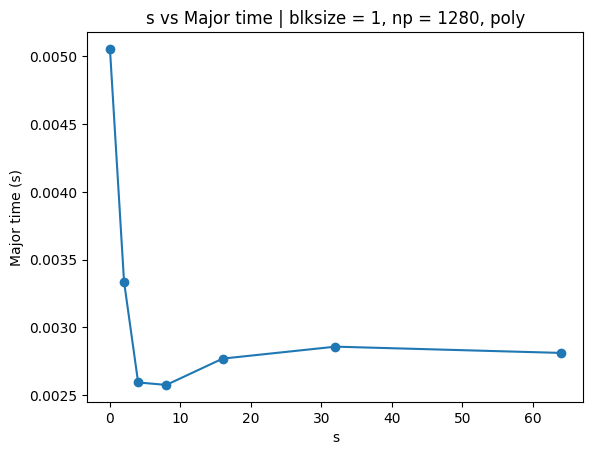

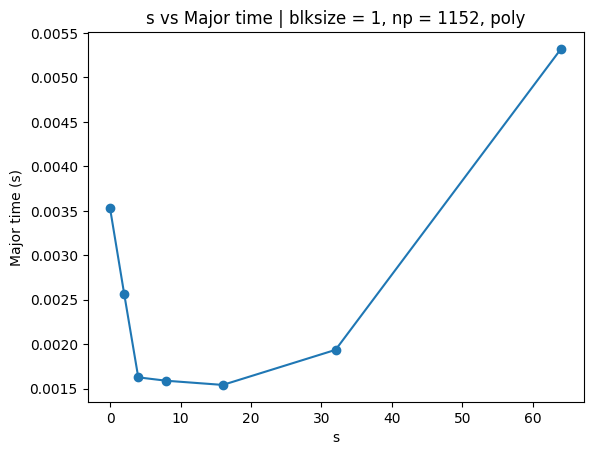

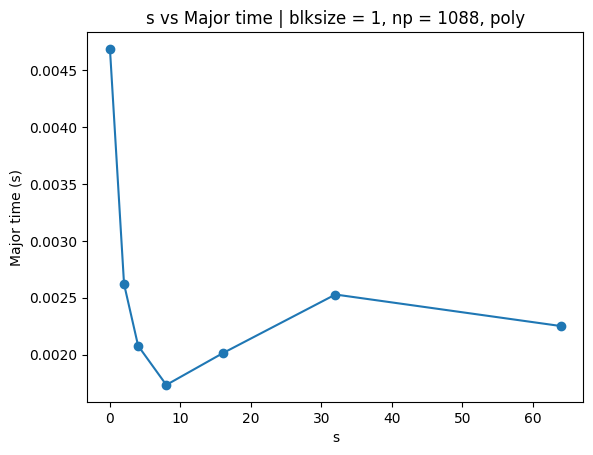

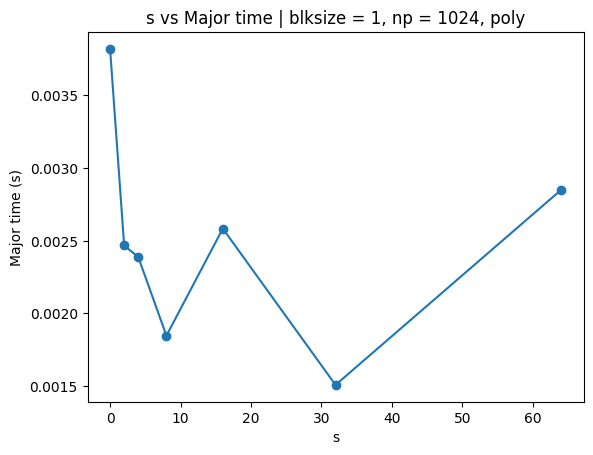

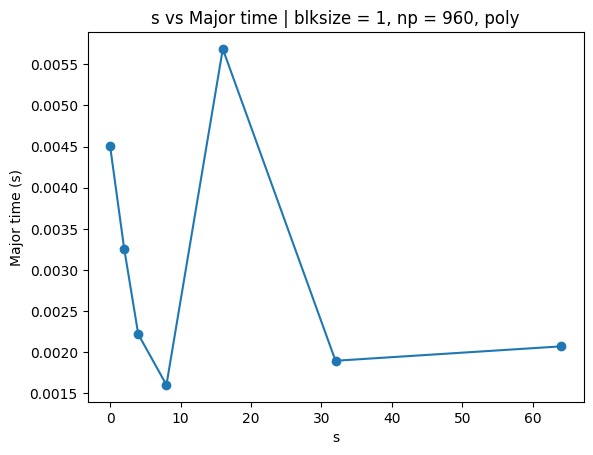

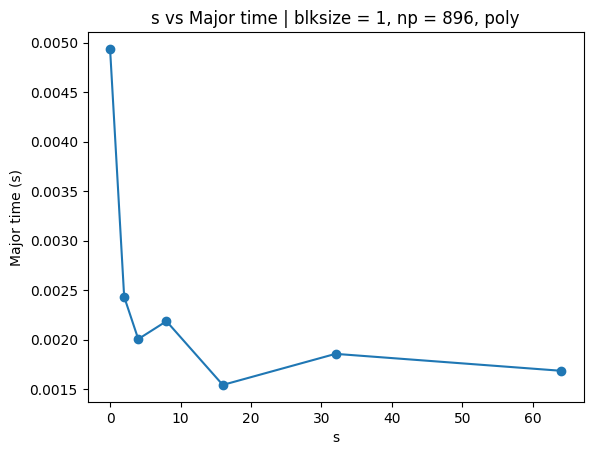

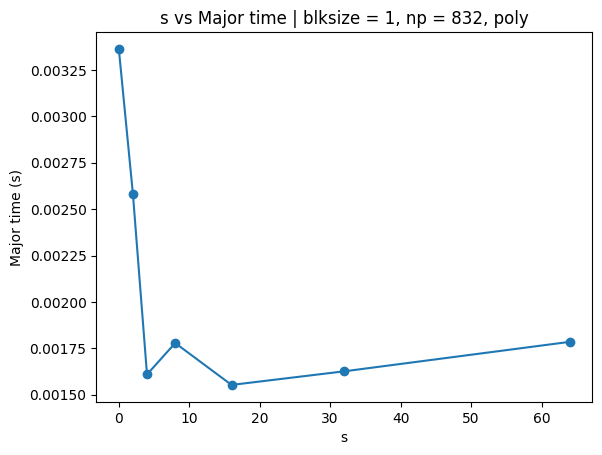

In [63]:
# for loop to save the figures
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Assuming data is your DataFrame
unique_num_process_values = data['num_process'].unique()

# Specify your directory
directory = "/Users/shaozishan/Desktop/Data_Plot_BDCD/figures/caksvm_newsbinary_linear"

for num_process in unique_num_process_values:
    df = data[(data['num_process'] == num_process) & (data['blksize'] == 1)]
    df = df[0:7]

    s = df['s']
    major_time = df['major_time']

    # Create the line plot
    plt.figure()  # start a new figure for each loop
    plt.plot(s, major_time, marker='o')

    # Set the labels and title
    plt.xlabel('s')
    plt.ylabel('Major time (s)')
    title_str = 's vs Major time | blksize = 1, np = {}, linear'.format(num_process)
    plt.title(title_str)

    # Save the figure before displaying
    filename = title_str.replace(' ', '_') + '.png'
    
    # Use os.path.join to create the full path
    full_path = os.path.join(directory, filename)

    plt.savefig(full_path)
    
    # Display the plot
    plt.show()



### Even Space Version Major Time vs s


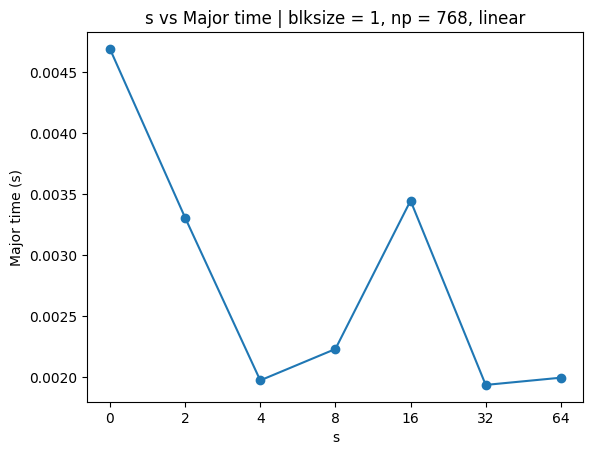

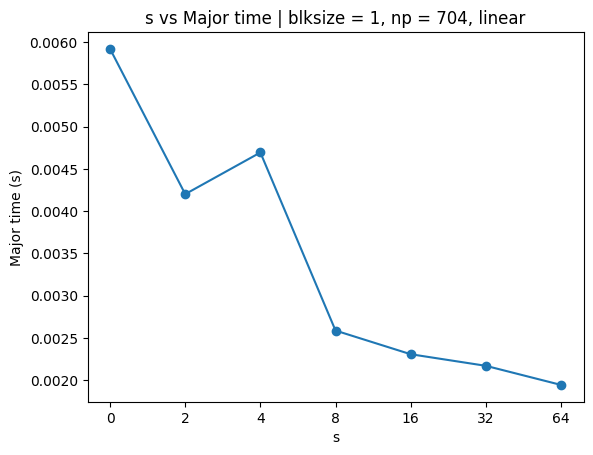

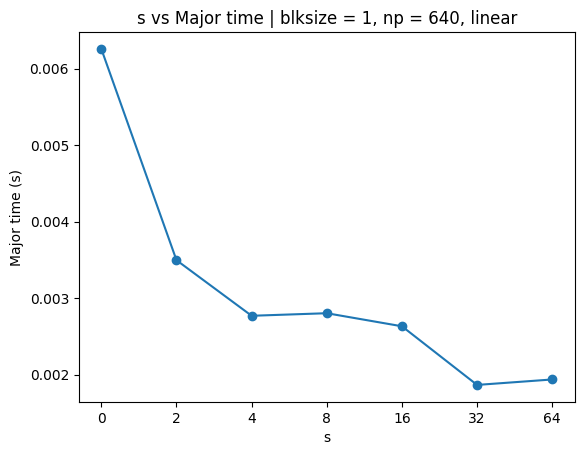

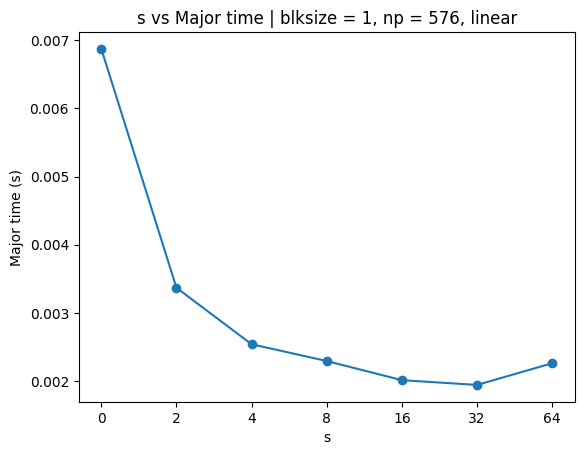

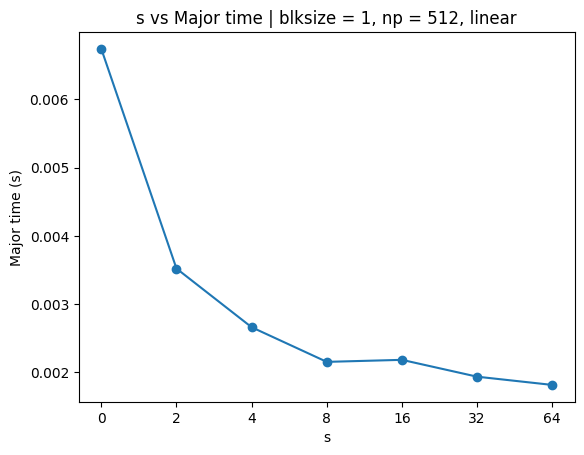

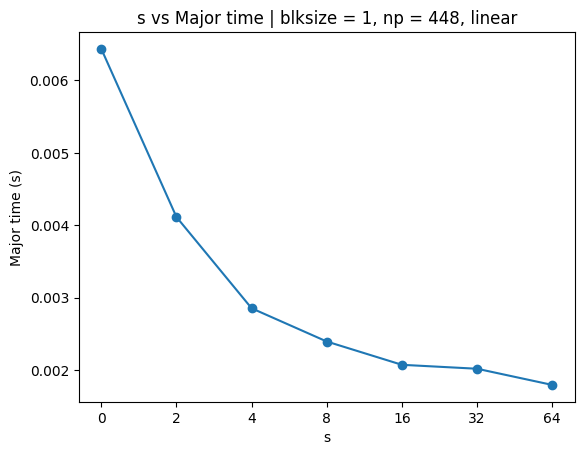

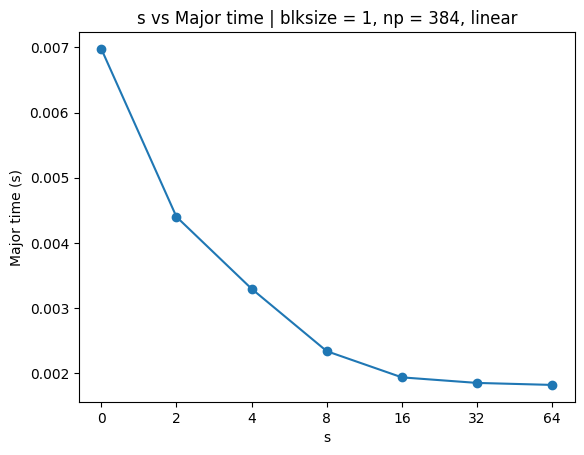

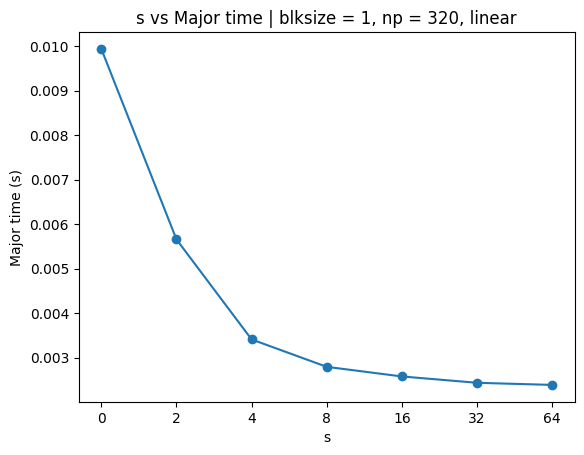

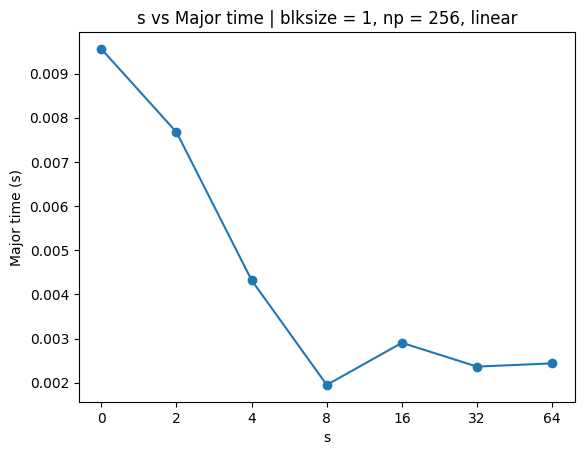

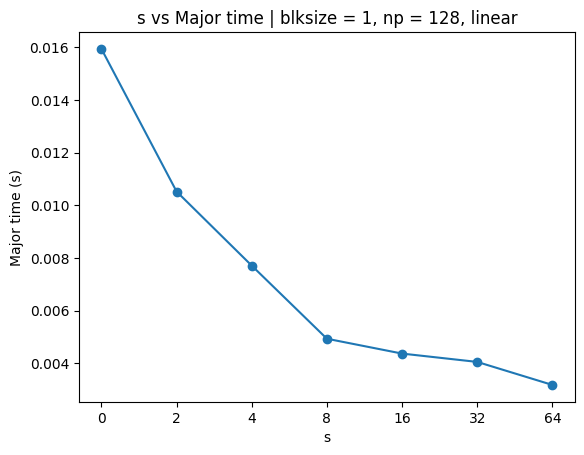

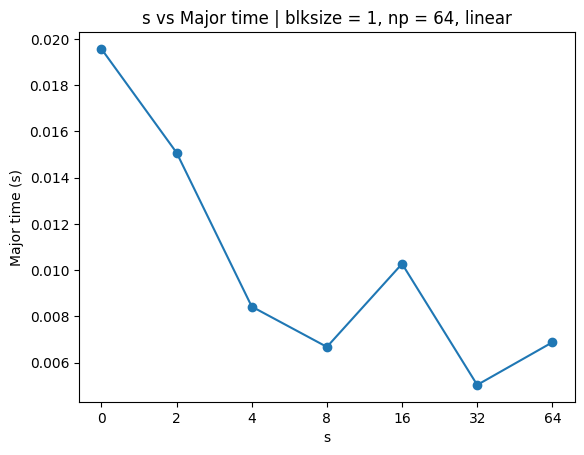

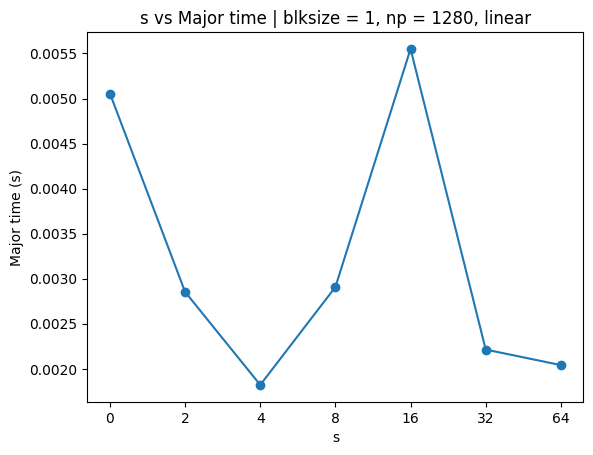

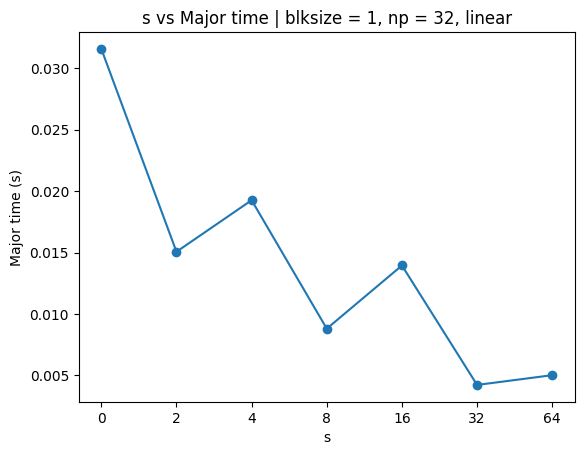

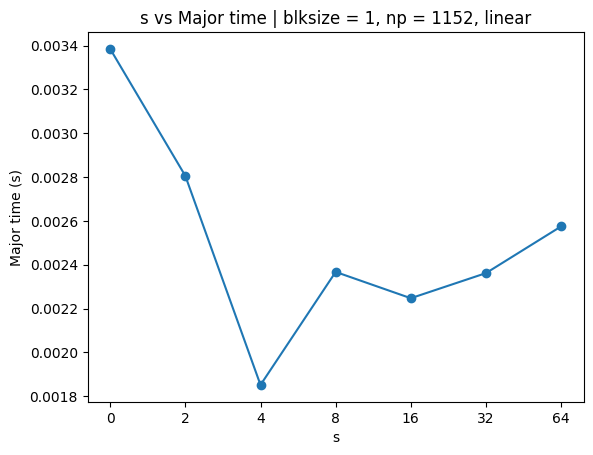

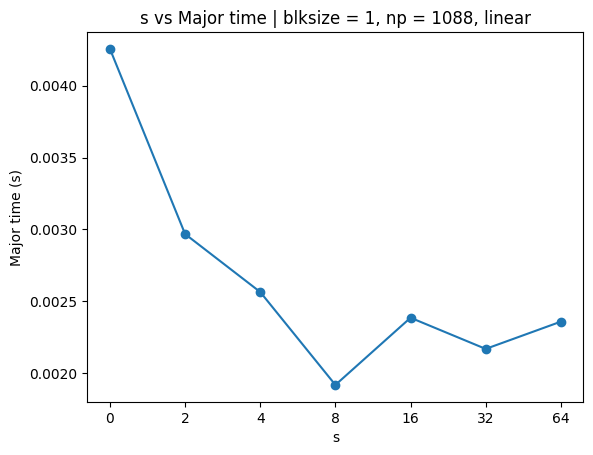

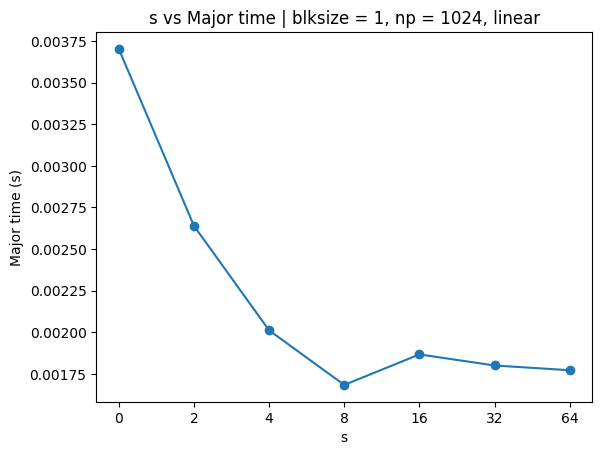

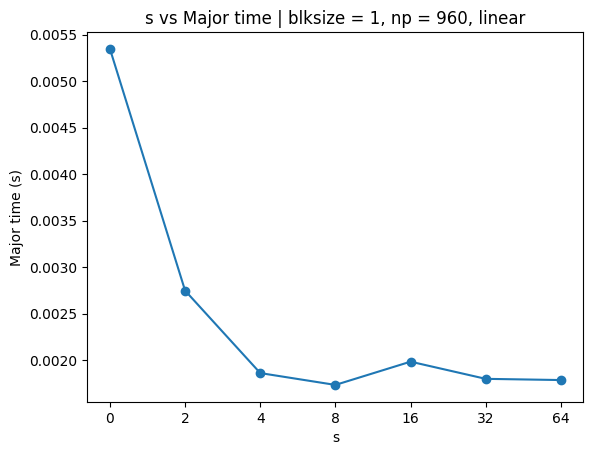

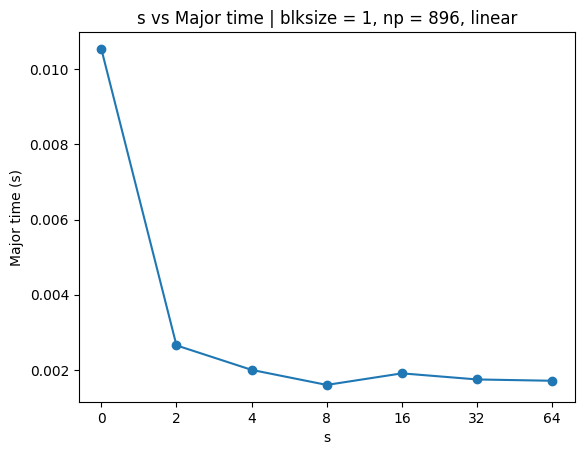

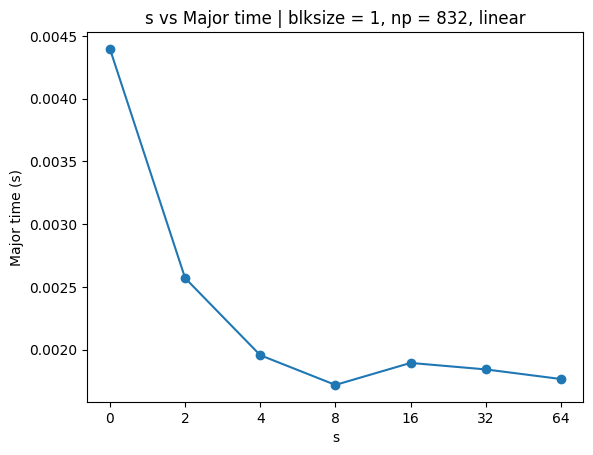

In [80]:
# for loop to save the figures
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Assuming data is your DataFrame
unique_num_process_values = data['num_process'].unique()

# Specify your directory
directory = "/Users/shaozishan/Desktop/Data_Plot_BDCD/figures/caksvm_newsbinary_linear"

for num_process in unique_num_process_values:
    df = data[(data['num_process'] == num_process) & (data['blksize'] == 1)]
    df = df[0:7]

    # Sort s and major_time in ascending order of s
    sorted_indices = df['s'].argsort()
    s = df['s'].values[sorted_indices]
    major_time = df['major_time'].values[sorted_indices]

    # Create a new variable for plotting, with equally spaced values
    s_plot = np.arange(len(s))

    # Create the line plot, using s_plot for the x-coordinates
    plt.plot(s_plot, major_time, marker='o')

    # Set the labels and title
    plt.xlabel('s')
    plt.ylabel('Major time (s)')
    title_str = 's vs Major time | blksize = 1, np = {}, linear'.format(num_process)
    plt.title(title_str)

    plt.xticks(ticks=s_plot, labels=s)
    
    # Save the figure before displaying
    filename = title_str.replace(' ', '_') + '.png'
    
    # Use os.path.join to create the full path
    full_path = os.path.join(directory, filename)

    plt.savefig(full_path)
    
    
    # Display the plot
    plt.show()



### Plot Allreduce time vs s

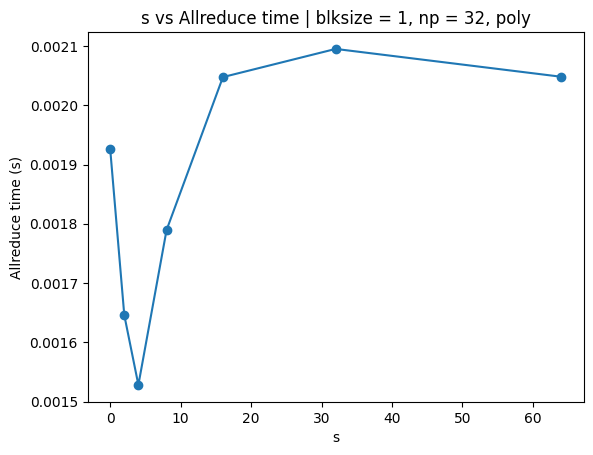

In [64]:
# Plot the allreduce time to see improvements in latency (by s)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# df = scaling[(scaling['s'] == 2) & (scaling['blksize'] == 1)]
# 320, 384, 448, 512, 576, 640, 704, 768, 832, 896, 960, 1024, 1088, 1152, 1280
df = data[(data['num_process'] == 1280) & (data['blksize'] == 1)]

df = df[0:7]

s = df['s']
major_time = df['allreduce_time']

# Create the line plot
plt.plot(s, major_time, marker='o')

# Set the labels and title
plt.xlabel('s')
plt.ylabel('Allreduce time (s)')
plt.title('s vs Allreduce time | blksize = 1, np = 32, poly')

# Display the plot
plt.show()



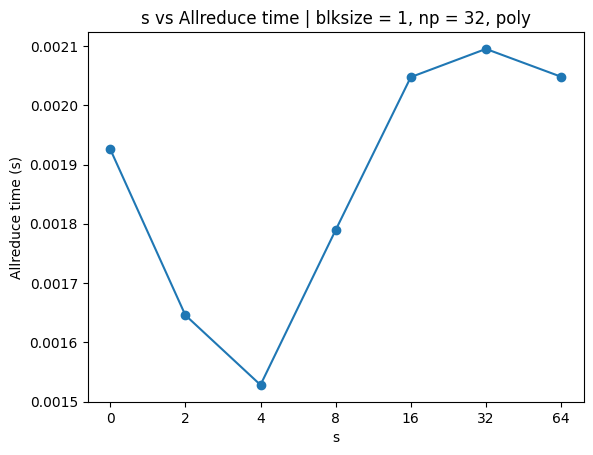

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = data[(data['num_process'] == 1280) & (data['blksize'] == 1)]
df = df[0:7]

# Sort s and major_time in ascending order of s
sorted_indices = df['s'].argsort()
s = df['s'].values[sorted_indices]
major_time = df['allreduce_time'].values[sorted_indices]

# Create a new variable for plotting, with equally spaced values
s_plot = np.arange(len(s))

# Create the line plot, using s_plot for the x-coordinates
plt.plot(s_plot, major_time, marker='o')

# Set the labels and title
plt.xlabel('s')
plt.ylabel('Allreduce time (s)')
plt.title('s vs Allreduce time | blksize = 1, np = 32, poly')

# Set the x-ticks to be at the positions of s_plot,
# and their labels to be the corresponding original 's' values
plt.xticks(ticks=s_plot, labels=s)

# Display the plot
plt.show()


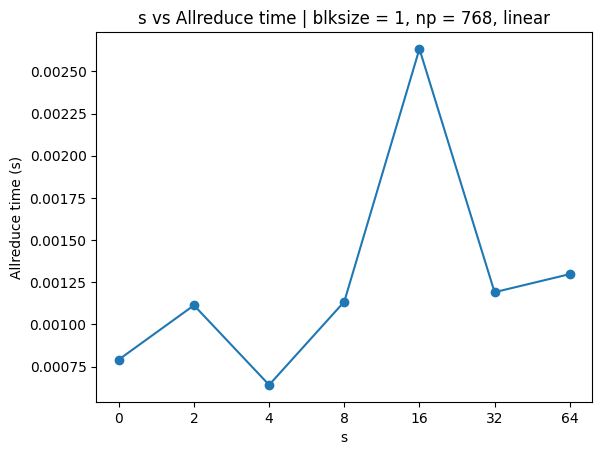

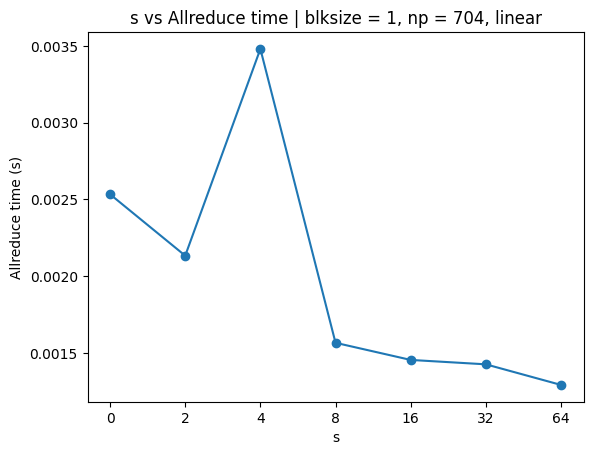

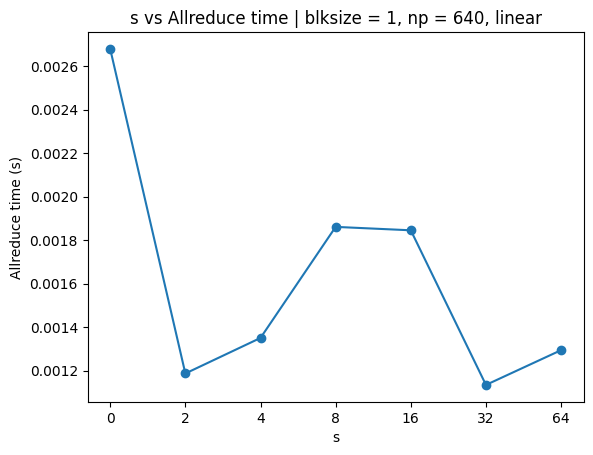

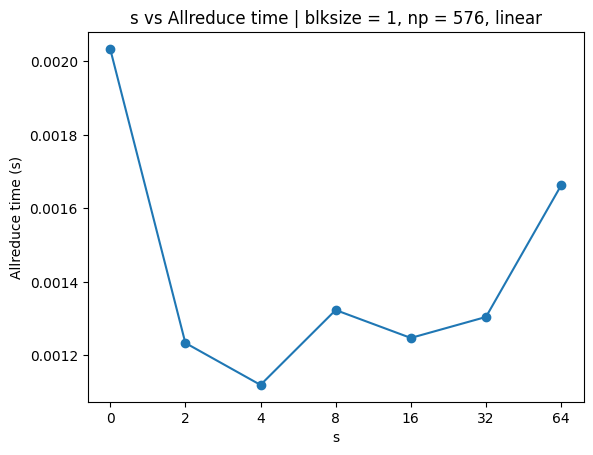

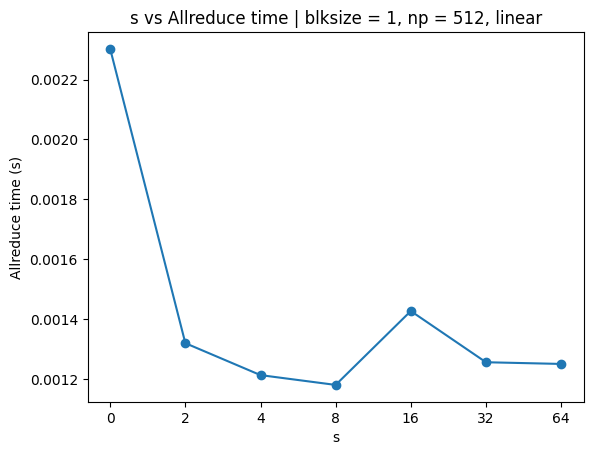

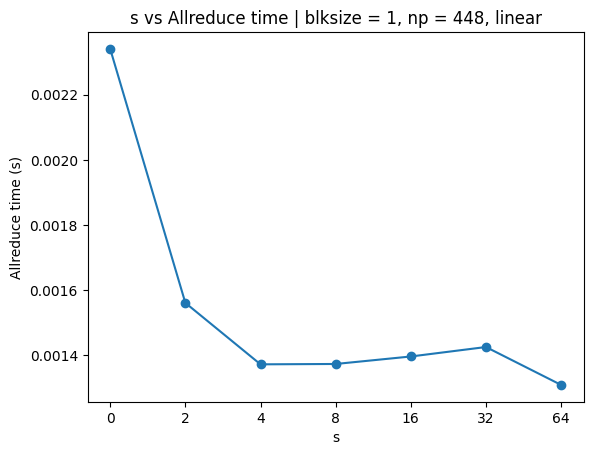

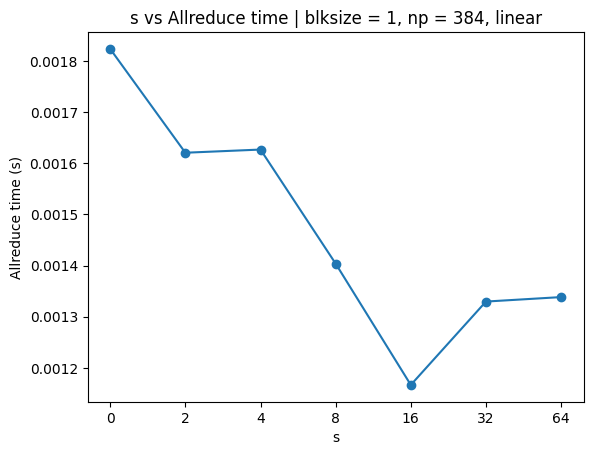

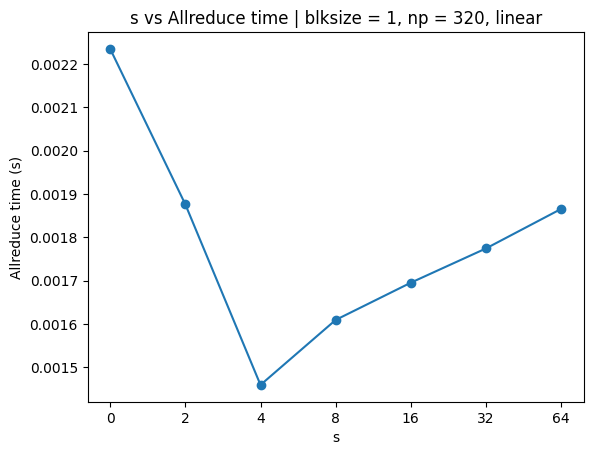

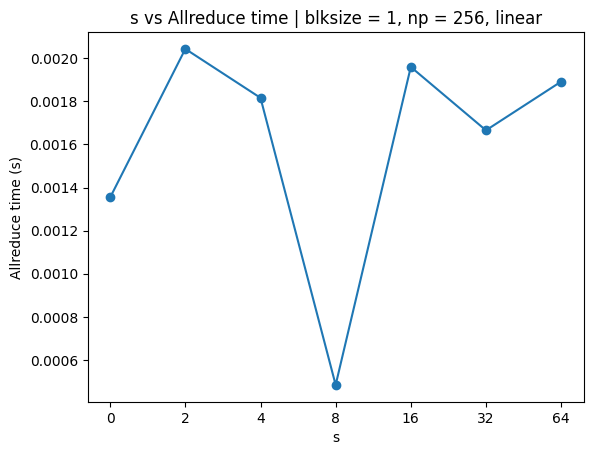

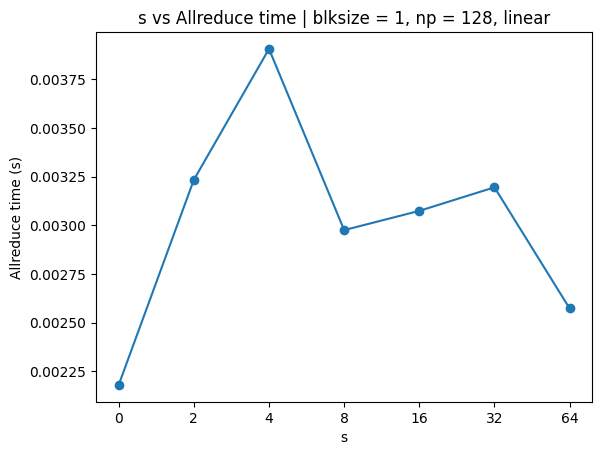

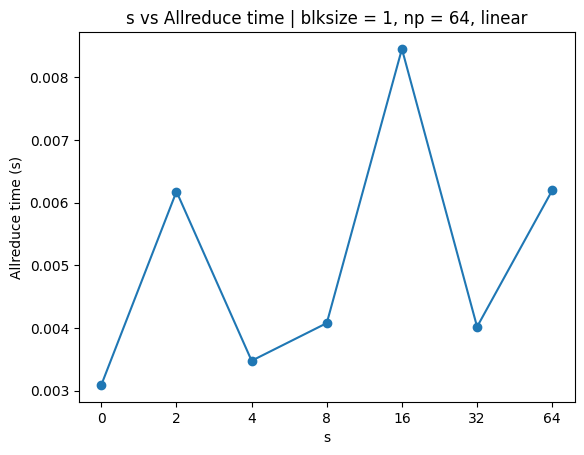

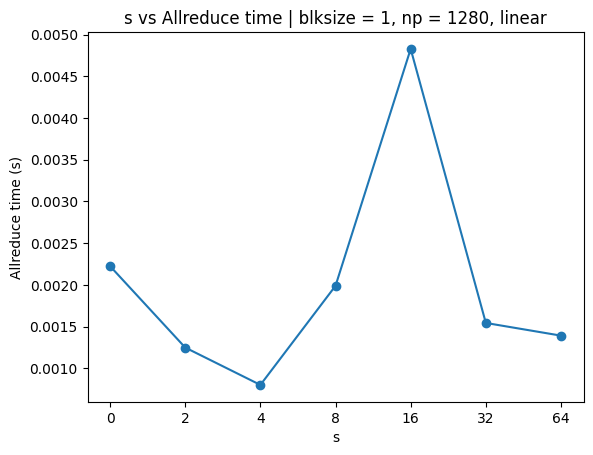

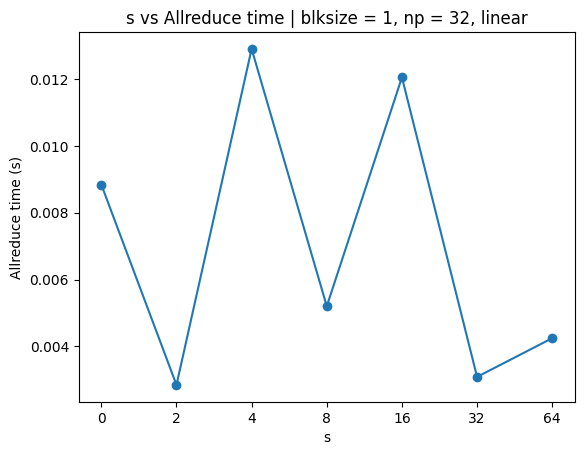

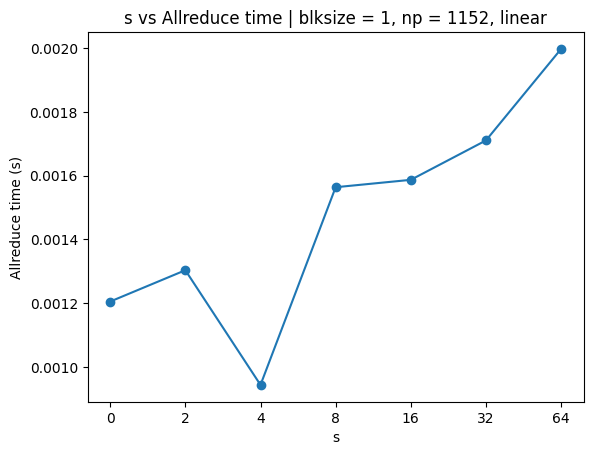

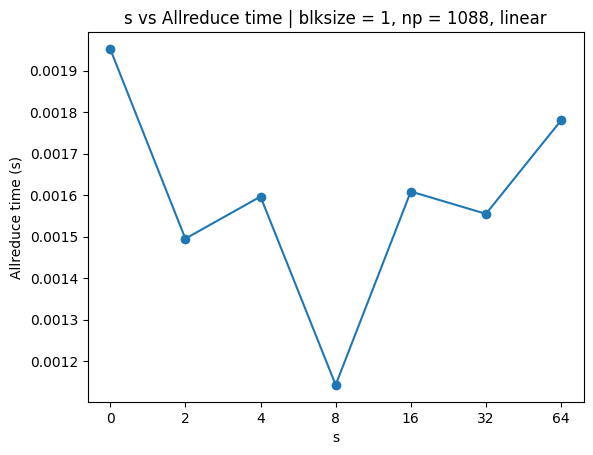

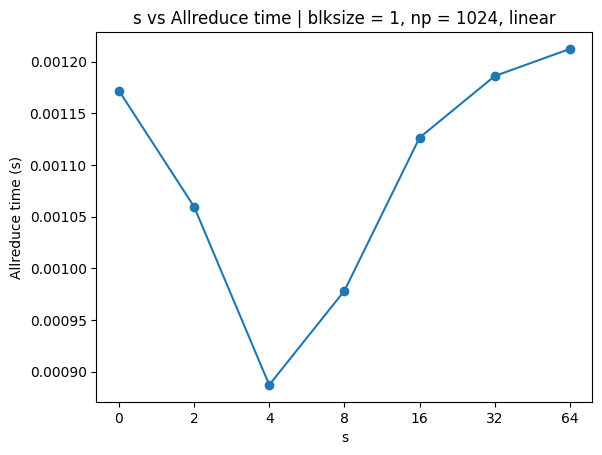

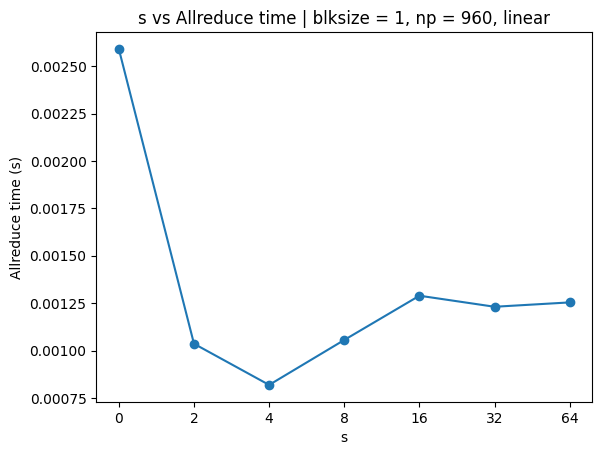

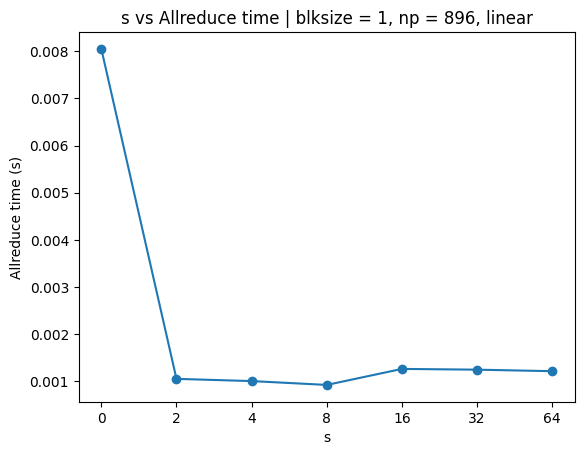

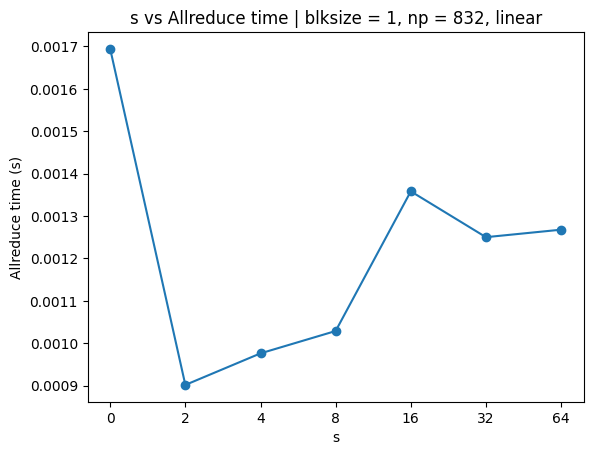

In [81]:
# for loop to save the figures
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Assuming data is your DataFrame
unique_num_process_values = data['num_process'].unique()

# Specify your directory
directory = "/Users/shaozishan/Desktop/Data_Plot_BDCD/figures/caksvm_newsbinary_linear"

for num_process in unique_num_process_values:
    df = data[(data['num_process'] == num_process) & (data['blksize'] == 1)]
    df = df[0:7]

    # Sort s and major_time in ascending order of s
    sorted_indices = df['s'].argsort()
    s = df['s'].values[sorted_indices]
    major_time = df['allreduce_time'].values[sorted_indices]

    # Create a new variable for plotting, with equally spaced values
    s_plot = np.arange(len(s))

    # Create the line plot, using s_plot for the x-coordinates
    plt.plot(s_plot, major_time, marker='o')

    # Set the labels and title
    plt.xlabel('s')
    plt.ylabel('Allreduce time (s)')
    title_str = 's vs Allreduce time | blksize = 1, np = {}, linear'.format(num_process)
    plt.title(title_str)

    plt.xticks(ticks=s_plot, labels=s)
    
    # Save the figure before displaying
    filename = title_str.replace(' ', '_') + '.png'
    
    # Use os.path.join to create the full path
    full_path = os.path.join(directory, filename)

    plt.savefig(full_path)
    
    
    # Display the plot
    plt.show()



In [90]:
data = pd.read_csv("/Users/shaozishan/Desktop/Data_Plot_BDCD/NERSC_outputs/caksvm_data_a9a_poly.csv")

In [91]:
data.head(7)

,filename,kernel,num_process,s,blksize,degree,max_iter,Gauss_para,LAMBDA,csr_setup_time,kernel_computation,allreduce_time,sample_time,csr_read_time,gradient_comp_time,alpha_update,memory_reset,major_time,runtime
0,a9a.txt,poly,64,64,1,5,2560,1.0,1.0,0.033186,0.000307,0.001014,2.228000e-07,0.063795,0.000157,3.688000e-07,0.000232,0.001712,4.479662
1,a9a.txt,poly,64,32,1,5,2560,1.0,1.0,0.029255,0.000340,0.001046,3.002000e-07,0.056962,0.000186,3.468000e-07,0.000247,0.001821,4.747237
2,a9a.txt,poly,64,16,1,5,2560,1.0,1.0,0.029382,0.000292,0.001571,4.420000e-07,0.056555,0.000134,9.041000e-07,0.000246,0.002244,5.831304
3,a9a.txt,poly,64,8,1,5,2560,1.0,1.0,0.045590,0.000241,0.001391,1.243000e-07,0.031753,0.000032,8.772000e-07,0.000027,0.001692,4.408201
4,a9a.txt,poly,64,4,1,5,2560,1.0,1.0,0.029709,0.000115,0.000958,6.920000e-08,0.031265,0.000024,2.927000e-07,0.000010,0.001108,2.898337
5,a9a.txt,poly,64,2,1,5,2560,1.0,1.0,0.028997,0.000155,0.001256,1.488000e-07,0.031348,0.000026,3.935000e-07,0.000014,0.001452,3.777015
6,a9a.txt,poly,64,1,1,5,2560,1.0,1.0,0.028998,0.000168,0.001024,1.846000e-07,0.033256,0.000011,3.728000e-07,0.000011,0.001215,3.173612


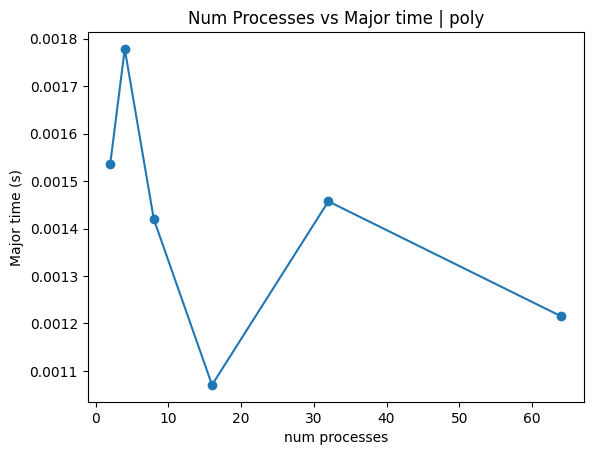

In [93]:
# Plot the impact of increasing processes vs major time reduced (all with blksize = 1)
# Plot the allreduce time to see improvements in latency (by s)

## In this case, only BDCD --> s = 0

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Specify your directory
directory = "/Users/shaozishan/Desktop/Data_Plot_BDCD/figures"

df = data[(data['s'] == 1) & (data['blksize'] == 1)]

df = df.drop_duplicates(subset='num_process', keep='first')
df = df.sort_values(by='num_process')

num_process = df['num_process']
major_time = df['major_time']

# Create the line plot
plt.plot(num_process, major_time, marker='o')

# Set the labels and title
plt.xlabel('num processes')
plt.ylabel('Major time (s)')
plt.title('Num Processes vs Major time | poly')

filename = 'Num_Processes_vs_Major_time_poly'
# Use os.path.join to create the full path
full_path = os.path.join(directory, filename)

plt.savefig(full_path)

# Display the plot
plt.show()




In [52]:
df = df.drop_duplicates(subset='num_process', keep='first')
df

,filename,kernel,num_process,s,blksize,degree,max_iter,Gauss_para,LAMBDA,csr_setup_time,kernel_computation,allreduce_time,sample_time,csr_read_time,gradient_comp_time,alpha_update,memory_reset,major_time,runtime
6,news20.binary,linear,768,0,1,5,640,1.0,1.0,4.772792,0.003839,0.000792,1.887200e-06,8.317976,0.000029,0.000006,0.000024,0.004691,16.093402
41,news20.binary,linear,704,0,1,5,640,1.0,1.0,8.045250,0.003353,0.002534,1.837700e-06,7.871442,0.000018,0.000003,0.000011,0.005920,19.705746
76,news20.binary,linear,640,0,1,5,640,1.0,1.0,5.270876,0.003541,0.002679,1.827600e-06,8.233005,0.000018,0.000009,0.000009,0.006258,17.509195
111,news20.binary,linear,576,0,1,5,640,1.0,1.0,5.421570,0.004751,0.002034,7.449900e-06,8.471839,0.000052,0.000013,0.000016,0.006872,18.291898
146,news20.binary,linear,512,0,1,5,640,1.0,1.0,5.791441,0.004263,0.002303,1.269700e-06,9.201846,0.000050,0.000006,0.000115,0.006739,19.306180
181,news20.binary,linear,448,0,1,5,640,1.0,1.0,6.230340,0.004054,0.002341,2.166400e-06,10.286944,0.000024,0.000007,0.000008,0.006435,20.636169
216,news20.binary,linear,384,0,1,5,640,1.0,1.0,7.032935,0.005122,0.001823,2.574600e-06,11.443093,0.000015,0.000006,0.000006,0.006976,22.940628
251,news20.binary,linear,320,0,1,5,640,1.0,1.0,8.508970,0.007649,0.002235,4.520500e-06,13.460656,0.000029,0.000011,0.000008,0.009937,28.329527
286,news20.binary,linear,256,0,1,5,640,1.0,1.0,10.931430,0.008084,0.001354,5.327800e-06,16.561623,0.000022,0.000007,0.000086,0.009559,33.611258
321,news20.binary,linear,128,0,1,5,640,1.0,1.0,20.005911,0.013673,0.002179,1.596800e-06,31.938943,0.000043,0.000003,0.000036,0.015937,62.144784
